In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_csv_path = os.path.join("dataset", r"F:\minor_project2\dataset\encrypted_features\encrypted_features_edited.csv")
df = pd.read_csv(feature_csv_path)

In [5]:
df.tail(40)

,freq_a,freq_b,freq_c,freq_d,freq_e,freq_f,freq_g,freq_h,freq_i,freq_j,...,MKA,DIC,EDI,LR,LDI,SDD,NOMOR,RDI,ChiSquare,label
404364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.384615,106.442577,0.013289,20.140126,0.0,0.0,112,0.0,25.133221,Plaintext
404365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.384615,106.442577,0.013289,20.140126,0.0,0.0,122,0.0,1582.272098,Caesar
404366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.631579,4.999375,0.001488,0.000000,0.0,0.0,175,0.0,498.899290,AES
404367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.504950,4.576659,0.000000,0.000000,0.0,0.0,142,0.0,411.059526,RC4
404368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.147541,84.325397,0.005861,37.684458,0.0,0.0,186,0.0,26.484545,Plaintext
404369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.147541,84.325397,0.005861,37.684458,0.0,0.0,190,0.0,408.083868,Caesar
404370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.468085,7.053430,0.002096,0.000000,0.0,0.0,181,0.0,223.607602,AES
404371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106.666667,16.038492,0.002114,0.000000,0.0,0.0,182,0.0,694.171008,RC4
404372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.896104,99.268548,0.008266,29.727543,0.0,0.0,148,0.0,33.445054,Plaintext
404373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.896104,99.268548,0.008266,29.727543,0.0,0.0,194,0.0,453.978693,Caesar


In [7]:
# 🧹 Prepare features and labels
X = df.drop(columns=["label","freq_a","freq_b","freq_c","freq_d","freq_e","freq_f","freq_g","freq_h","freq_i","freq_j","freq_k","freq_l","freq_m",
                     "freq_n","freq_o","freq_p","freq_q","freq_r","freq_s","freq_t","freq_u","freq_v","freq_w","freq_x","freq_y","freq_z","LDI","RDI"])
y = df["label"]

In [8]:
# Encode labels (AES, RC4, Caesar → 0,1,2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [10]:
# 🤖 Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# 📈 Evaluate
y_pred = clf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

=== Classification Report ===
              precision    recall  f1-score   support

         AES       0.94      1.00      0.97     30331
      Caesar       1.00      1.00      1.00     30330
   Plaintext       1.00      1.00      1.00     30331
         RC4       1.00      0.94      0.97     30330

    accuracy                           0.98    121322
   macro avg       0.98      0.98      0.98    121322
weighted avg       0.98      0.98      0.98    121322




=== Confusion Matrix ===


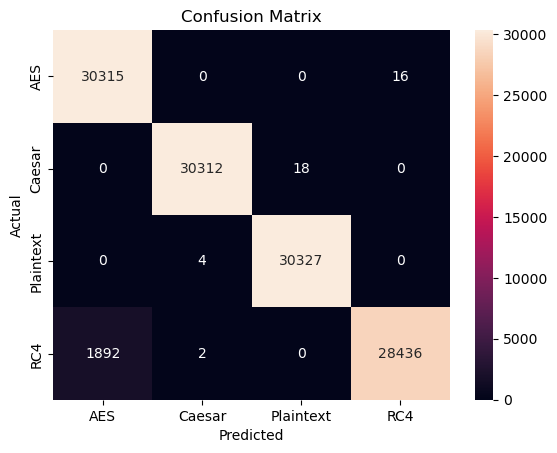

In [17]:
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ascii_min: 0.0633
ChiSquare: 0.0579
equals_ratio: 0.0541
freq_=: 0.0527
length: 0.0493
freq_A: 0.0486
freq_T: 0.0482
freq_Q: 0.0459
digit_ratio: 0.0419
entropy: 0.0407
ascii_std: 0.0371
unique_chars: 0.0337
DIC: 0.0261
freq_E: 0.0258
MIC: 0.0251


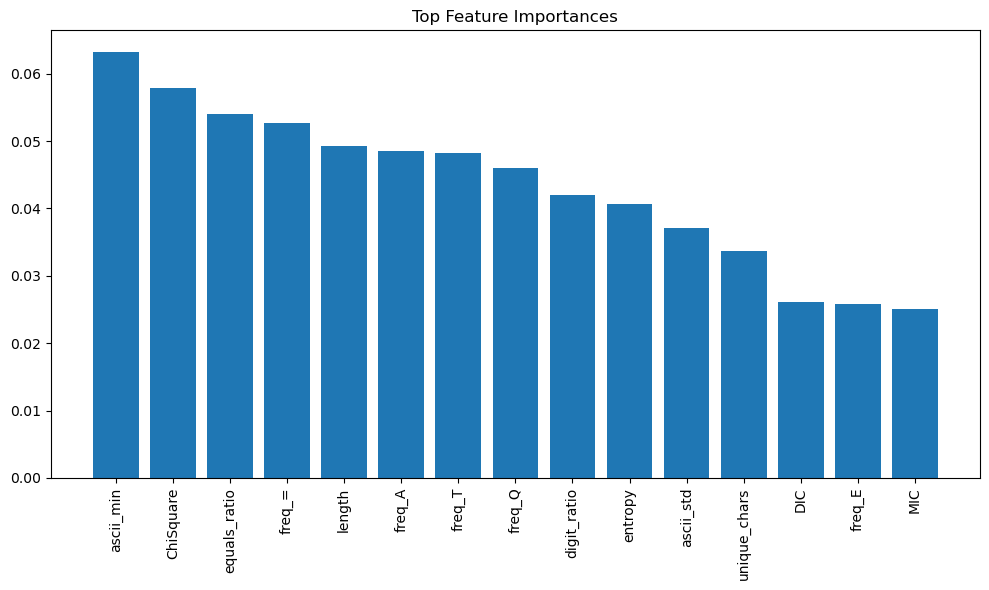

In [18]:
importances = clf.feature_importances_
feature_names = X.columns

# Top 15 most important features
top_indices = importances.argsort()[::-1][:15]
top_features = [(feature_names[i], importances[i]) for i in top_indices]

# Print and plot
for name, score in top_features:
    print(f"{name}: {score:.4f}")

# Optional plot
plt.figure(figsize=(10, 6))
plt.bar([feature_names[i] for i in top_indices], importances[top_indices])
plt.xticks(rotation=90)
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()

In [33]:
# Decode labels back to strings
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create a DataFrame to inspect
results_df = X_test.copy()
results_df['true_label'] = y_test_labels
results_df['predicted_label'] = y_pred_labels

# Show misclassified examples
misclassified = results_df[results_df['true_label'] != results_df['predicted_label']]
print("=== Misclassified Samples ===")
print(misclassified)


=== Misclassified Samples ===
          freq_A    freq_B    freq_C    freq_D    freq_E    freq_F    freq_G  \
85891   0.166667  0.166667  0.083333  0.000000  0.000000  0.041667  0.041667   
25123   0.136364  0.045455  0.000000  0.068182  0.000000  0.068182  0.022727   
370199  0.023438  0.007812  0.023438  0.031250  0.007812  0.046875  0.023438   
14411   0.000000  0.034091  0.011364  0.034091  0.000000  0.034091  0.045455   
104919  0.056818  0.011364  0.011364  0.068182  0.045455  0.068182  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
38635   0.031250  0.039062  0.039062  0.000000  0.070312  0.054688  0.031250   
71603   0.034091  0.022727  0.022727  0.000000  0.034091  0.034091  0.022727   
260771  0.039062  0.039062  0.046875  0.015625  0.031250  0.046875  0.031250   
269587  0.015625  0.031250  0.046875  0.000000  0.031250  0.062500  0.031250   
19195   0.045455  0.011364  0.011364  0.079545  0.022727  0.022727  0.034091   

         

In [ ]:
X_sample = X_test.sample(n=1000, random_state=42)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_df = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)

# Plot top 20
perm_df.head(20).plot(kind='barh')
plt.title("Top 20 Permutation Importances")
plt.gca().invert_yaxis()
plt.show()


In [59]:
import joblib

joblib.dump(clf, r"F:\minor_project2\model\encrytion_model.pkl")

['F:\\minor_project2\\model\\encrytion_model.pkl']

In [61]:
joblib.dump(label_encoder, r"F:\minor_project2\model\label_encoder.pkl")

['F:\\minor_project2\\model\\label_encoder.pkl']